# Zadanie 1

In [5]:
import pandas as pd
import os

filepaths = [f for f in os.listdir('/content/') if f.endswith('.parquet')]

df = pd.concat([pd.read_parquet(f'/content/{file}') for file in filepaths])

df.info()
print(f"Rozmiar pamięci RAM: {sum(df.memory_usage(deep=True)) / 1024**2:.2f} MB")

<class 'pandas.core.frame.DataFrame'>
Index: 3442074 entries, 0 to 1147357
Data columns (total 17 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   sid                  int64 
 1   sid_profile          int64 
 2   post_id              object
 3   profile_id           int64 
 4   date                 object
 5   post_type            int64 
 6   description          object
 7   likes                int64 
 8   comments             int64 
 9   username             object
 10  bio                  object
 11  following            int64 
 12  followers            int64 
 13  num_posts            int64 
 14  is_business_account  bool  
 15  lang                 object
 16  category             object
dtypes: bool(1), int64(9), object(7)
memory usage: 449.7+ MB
Rozmiar pamięci RAM: 4275.10 MB


In [6]:
df.head(10)

,sid,sid_profile,post_id,profile_id,date,post_type,description,likes,comments,username,bio,following,followers,num_posts,is_business_account,lang,category
0,8440863,3204323,Bv73XqABR9L,246423906,2019-04-07 03:10:47,1,😍😍😍,9,0,bnicole4786,There's a lot of beauty in ordinary things. Is...,183,896,646,False,en,diaries_&_daily_life
1,8440361,3204323,BwxI3IvhLBe,246423906,2019-04-27 19:43:23,1,New cut and caramel highlights by @thatdudewit...,18,3,bnicole4786,There's a lot of beauty in ordinary things. Is...,183,896,646,False,en,fashion_&_style
2,17502567,2207369,Bvpxcd6lKcu,4501421787,2019-03-31 01:32:41,1,Dinner and drinks with this fella!,7,0,gay_jody,None,107,58,9,False,en,food_&_dining
3,17502558,2207369,BxX7HAdFZ5V,4501421787,2019-05-12 15:13:36,1,Happy Mother's day! Love you!,9,0,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
4,17502563,2207369,Bwqa83kFlIW,4501421787,2019-04-24 23:06:46,1,So out of my comfort zone!,10,1,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
5,17502575,2207369,BrK-mfcF32d,4501421787,2018-12-09 10:25:37,1,BW in the sunshine.,16,0,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
6,17502581,2207369,BrG8-2bl2tz,4501421787,2018-12-07 20:54:30,1,Kitty snuggles!,7,0,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
7,17502586,2207369,BnSJZsClu0u,4501421787,2018-09-03 20:09:06,1,Fancy,7,0,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
8,17502591,2207369,BnSJT7EFRw0,4501421787,2018-09-03 20:08:19,1,Sweet little girl,10,1,gay_jody,None,107,58,9,False,en,diaries_&_daily_life
9,17502600,2207369,BYMh0D7FZJm,4501421787,2017-08-24 19:56:03,1,All the way from St. Croix!,33,1,gay_jody,None,107,58,9,False,en,diaries_&_daily_life


# Zadanie 2

In [ ]:
def sizeof_fmt(num, suffix="B"):
    for unit in ("", "Ki", "Mi", "Gi", "Ti", "Pi", "Ei", "Zi"):
        if abs(num) < 1024.0:
            return f"{num:3.1f}{unit}{suffix}"
        num /= 1024.0
    return f"{num:.1f}Yi{suffix}"

In [8]:
import numpy as np

df_optimized = df.copy()

df_optimized['sid'] = df_optimized['sid'].astype(np.int32)
df_optimized['sid_profile'] = df_optimized['sid_profile'].astype(np.int32)
df_optimized['post_type'] = df_optimized['post_type'].astype(np.int16)
df_optimized['likes'] = df_optimized['likes'].astype(np.int32)
df_optimized['comments'] = df_optimized['comments'].astype(np.int32)
df_optimized['following'] = df_optimized['following'].astype(np.int32)
df_optimized['followers'] = df_optimized['followers'].astype(np.int32)
df_optimized['num_posts'] = df_optimized['num_posts'].astype(np.int16)

df_optimized['lang'] = df_optimized['lang'].astype('category')
df_optimized['date'] = pd.to_datetime(df_optimized['date'], errors='coerce')

print("Rozmiar pamięci przed optymalizacją:", sizeof_fmt(sum(df.memory_usage(deep=True))))
print("Rozmiar pamięci po optymalizacji:", sizeof_fmt(sum(df_optimized.memory_usage(deep=True))))

df_optimized.info()

Rozmiar pamięci przed optymalizacją: 4.2GiB
Rozmiar pamięci po optymalizacji: 3.7GiB
<class 'pandas.core.frame.DataFrame'>
Index: 3442074 entries, 0 to 1147357
Data columns (total 17 columns):
 #   Column               Dtype         
---  ------               -----         
 0   sid                  int32         
 1   sid_profile          int32         
 2   post_id              object        
 3   profile_id           int64         
 4   date                 datetime64[ns]
 5   post_type            int16         
 6   description          object        
 7   likes                int32         
 8   comments             int32         
 9   username             object        
 10  bio                  object        
 11  following            int32         
 12  followers            int32         
 13  num_posts            int16         
 14  is_business_account  bool          
 15  lang                 category      
 16  category             object        
dtypes: bool(1), category(1)

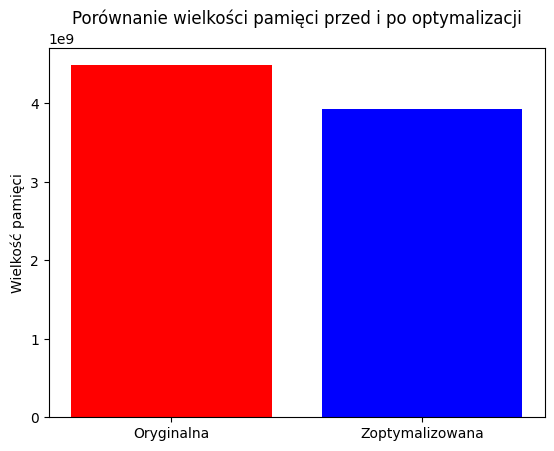

In [9]:
import matplotlib.pyplot as plt
sizes = [sizeof_fmt(sum(df.memory_usage(deep=True))), sizeof_fmt(sum(df_optimized.memory_usage(deep=True)))]
labels = ['Oryginalna', 'Zoptymalizowana']

sizes_num = [sum(df.memory_usage(deep=True)), sum(df_optimized.memory_usage(deep=True))]

plt.bar(labels, sizes_num, color=['red', 'blue'])
plt.ylabel('Wielkość pamięci')
plt.title('Porównanie wielkości pamięci przed i po optymalizacji')

plt.show()

# Zadanie 3

In [10]:
import time

start_time = time.time()
group_agg_orig = df.groupby('category').agg(
    total_likes=('likes', 'sum'),
    avg_comments=('comments', 'mean')
).reset_index()
print(f"Grupowanie i agregacja: {time.time() - start_time:.4f} s")

start_time = time.time()
filter_orig = df[df['followers'] > 1000]
print(f"Filtrowanie: {time.time() - start_time:.4f} s")

start_time = time.time()
sort_orig = df.sort_values(by='likes', ascending=False)
print(f"Sortowanie: {time.time() - start_time:.4f} s")

print("\nZoptymalizowane dane:")
start_time = time.time()
group_agg_opt = df_optimized.groupby('category').agg(
    total_likes=('likes', 'sum'),
    avg_comments=('comments', 'mean')
).reset_index()
print(f"Grupowanie i agregacja: {time.time() - start_time:.4f} s")

start_time = time.time()
filter_opt = df_optimized[df_optimized['followers'] > 1000]
print(f"Filtrowanie: {time.time() - start_time:.4f} s")

start_time = time.time()
sort_opt = df_optimized.sort_values(by='likes', ascending=False)
print(f"Sortowanie: {time.time() - start_time:.4f} s")

Grupowanie i agregacja: 0.3114 s
Filtrowanie: 0.3198 s
Sortowanie: 3.0319 s

Zoptymalizowane dane:
Grupowanie i agregacja: 0.3165 s
Filtrowanie: 0.2860 s
Sortowanie: 2.8645 s


# Zadanie 4

In [ ]:
df_optimized.to_csv('dane_zoptymalizowane.csv', header=True, index=False)

In [ ]:
from google.colab import files
files.download('dane_zoptymalizowane.csv')

# Zadanie 5

In [12]:
import dask.dataframe as dd
import time
import pandas as pd
import os
import multiprocessing


def read_full_dask():
    start = time.time()
    df = dd.read_csv('zamowienia.csv', sep=';', encoding='latin1')
    df.compute()
    end = time.time()
    czas = end - start
    print(f"Czas wczytywania całego pliku na raz: {czas:.2f} sekund")
    return czas


def read_blocks_dask():
    start = time.time()
    df = dd.read_csv('zamowienia.csv', sep=';', encoding='latin1', blocksize=25e6)
    df.compute()
    end = time.time()
    czas = end - start
    print(f"Czas wczytywania pliku z blokami (blocksize=25MB): {czas:.2f} sekund")
    return czas


def split_csv(n_splits):
    df = pd.read_csv('zamowienia.csv', sep=';', encoding='latin1')
    split_size = len(df) // n_splits
    for i in range(n_splits):
        split_df = df.iloc[i * split_size: (i + 1) * split_size]
        split_df.to_csv(f'zamowienia_split_{i}.csv', sep=';', index=False)
    if len(df) % n_splits != 0:
        split_df = df.iloc[n_splits * split_size:]
        split_df.to_csv(f'zamowienia_split_{n_splits}.csv', sep=';', index=False)


def read_file(file):
    df = pd.read_csv(file, sep=';', encoding='latin1')
    return df


def read_multiprocessing(n_processes):
    files = sorted([f for f in os.listdir('.') if f.startswith('zamowienia_split_') and f.endswith('.csv')])
    with multiprocessing.Pool(processes=n_processes) as pool:
        df_list = pool.map(read_file, files)
    df = pd.concat(df_list, ignore_index=True)
    return df


def main():
    cores = os.cpu_count()
    processes1 = max(1, cores - 2)
    processes2 = max(1, (cores - 2) * 2)

    read_full_dask()
    read_blocks_dask()

    split_csv(processes2)

    start = time.time()
    df_multiproc1 = read_multiprocessing(processes1)
    end = time.time()
    czas3 = end - start
    print(f"Czas wczytywania z użyciem multiprocessing (procesów: {processes1}): {czas3:.2f} sekund")

    start = time.time()
    df_multiproc2 = read_multiprocessing(processes2)
    end = time.time()
    czas4 = end - start
    print(f"Czas wczytywania z użyciem multiprocessing (procesów: {processes2}): {czas4:.2f} sekund")

    for i in range(processes2 + 1):
        file = f'zamowienia_split_{i}.csv'
        if os.path.exists(file):
            os.remove(file)

if __name__ == '__main__':
    main()

Czas wczytywania całego pliku na raz: 1.23 sekund
Czas wczytywania pliku z blokami (blocksize=25MB): 0.01 sekund
Czas wczytywania z użyciem multiprocessing (procesów: 1): 0.23 sekund
Czas wczytywania z użyciem multiprocessing (procesów: 1): 0.20 sekund
